In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Define function to fetch historical data from Yahoo Finance
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Set the date range
start_date = "2022-01-01"
end_date = "2023-01-01"

# Fetch data for S&P 500 (SPY) and VXX
spy_data = fetch_data("^GSPC", start_date, end_date)
vxx_data = fetch_data("VXX", start_date, end_date)

# Save the data to CSV files
spy_data.to_csv("spy_data.csv")
vxx_data.to_csv("vxx_data.csv")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


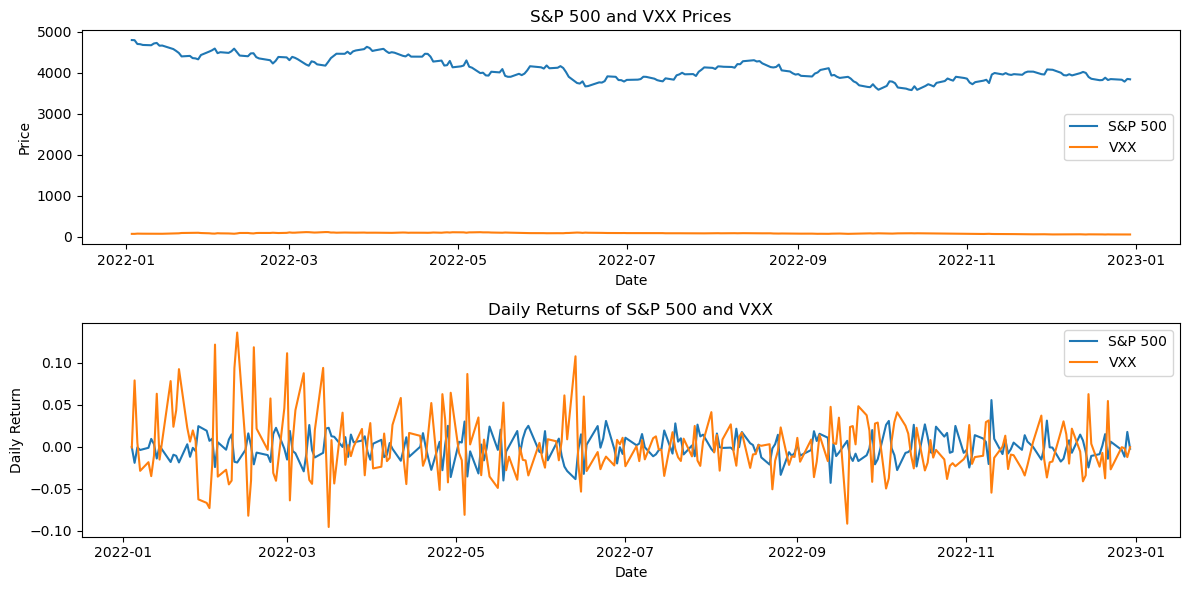

S&P 500 Volatility: 0.0153
VXX Volatility: 0.0369
Correlation between S&P 500 and VXX: -0.6851


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load historical data from CSV files
spy_data = pd.read_csv("spy_data.csv", index_col="Date", parse_dates=True)
vxx_data = pd.read_csv("vxx_data.csv", index_col="Date", parse_dates=True)

# Calculate daily returns
spy_data['Daily_Return'] = spy_data['Adj Close'].pct_change()
vxx_data['Daily_Return'] = vxx_data['Adj Close'].pct_change()

# Calculate volatility (standard deviation of daily returns)
spy_volatility = spy_data['Daily_Return'].std()
vxx_volatility = vxx_data['Daily_Return'].std()

# Calculate correlation between S&P 500 and VXX
correlation = spy_data['Daily_Return'].corr(vxx_data['Daily_Return'])

# Plotting
plt.figure(figsize=(12, 6))

# Plot S&P 500 and VXX prices
plt.subplot(2, 1, 1)
plt.plot(spy_data['Adj Close'], label='S&P 500')
plt.plot(vxx_data['Adj Close'], label='VXX')
plt.title('S&P 500 and VXX Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot daily returns
plt.subplot(2, 1, 2)
plt.plot(spy_data['Daily_Return'], label='S&P 500')
plt.plot(vxx_data['Daily_Return'], label='VXX')
plt.title('Daily Returns of S&P 500 and VXX')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

# Display the results
print(f"S&P 500 Volatility: {spy_volatility:.4f}")
print(f"VXX Volatility: {vxx_volatility:.4f}")
print(f"Correlation between S&P 500 and VXX: {correlation:.4f}")
